在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [1]:
import unicodecsv

## 长代码版本 (该版本与短代码版本功能一致)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## 从 daily_engagement.csv 和 project_submissions.csv 载入数据并存
## 储至下面的变量中，然后检查每张表的第1行。

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [3]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [4]:
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}

In [5]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## 修正数据类型

In [6]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [7]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [8]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## 数据中的问题

In [9]:
#####################################
#                 3                 #
#####################################

## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"
for engagement in daily_engagement:
    engagement["account_key"] = engagement.pop("acct")

In [10]:
daily_engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [11]:
daily_engagement[0]["account_key"]

u'0'

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

In [12]:
#####################################
#                 2                 #
#####################################

## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量
def get_unique_students(data):
    return set([x['account_key'] for x in data])

unique_enrolled_students = get_unique_students(enrollments)
unique_engagement_students = get_unique_students(daily_engagement)
unique_project_submitters = get_unique_students(project_submissions)

enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = len(unique_enrolled_students)

engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = len(unique_engagement_students)

submission_num_rows = len(project_submissions)
submission_num_unique_students = len(unique_project_submitters)

In [13]:
print(enrollment_num_rows)
print(enrollment_num_unique_students)
print(engagement_num_rows)
print(engagement_num_unique_students)
print(submission_num_rows)
print(submission_num_unique_students)

1640
1302
136240
1237
3642
743


## 缺失的互动（Engagement）记录

In [14]:
#####################################
#                 4                 #
#####################################

## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。
for enrollment in enrollments:
    student_id = enrollment["account_key"]
    if student_id not in unique_engagement_students:
        print(enrollment)
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## 检查更多的问题记录

In [15]:
#####################################
#                 5                 #
#####################################

## 计算无众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）
for enrollment in enrollments:
    student_id = enrollment["account_key"]
    if student_id not in unique_engagement_students:
        days_to_cancel = enrollment["days_to_cancel"]
        if days_to_cancel is None or days_to_cancel > 0:
            print(enrollment)

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


## 追踪剩余的问题

In [16]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [17]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [18]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


In [19]:
non_udacity_unique_enrolled_students = get_unique_students(non_udacity_enrollments)
non_udacity_unique_engagement_students = get_unique_students(non_udacity_engagement)
non_udacity_unique_project_submitters = get_unique_students(non_udacity_submissions)

print len(non_udacity_unique_enrolled_students)
print len(non_udacity_unique_engagement_students)
print len(non_udacity_unique_project_submitters)

1296
1234
741


## 重新定义问题

In [20]:
#####################################
#                 6                 #
#####################################

## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment["is_canceled"] or enrollment["days_to_cancel"] > 7:
        account_key = enrollment["account_key"]
        join_date = enrollment["join_date"]
        
        if account_key not in paid_students or join_date > paid_students[account_key]:
            paid_students[account_key] = join_date

In [21]:
len(paid_students)

995

## 获取第1周的数据
获取第1周的数据

In [22]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [23]:
#####################################
#                 7                 #
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数

def paid_filter(data):
    return [x for x in data if x["account_key"] in paid_students]

paid_enrollments = paid_filter(non_udacity_enrollments)
paid_engagement = paid_filter(non_udacity_engagement)
paid_submissions = paid_filter(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [24]:
paid_engagement_in_first_week = []
for engagement in paid_engagement:
    if within_one_week(paid_students[engagement["account_key"]], engagement["utc_date"]):
        paid_engagement_in_first_week.append(engagement)

len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [25]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [26]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [27]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## 纠错现有的数据分析代码

In [28]:
#####################################
#                 8                 #
#####################################

## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。
for account_key, total_minutes in total_minutes_by_account.items():
    if total_minutes > 3360:
        print(account_key, total_minutes)
        print(engagement_by_account[account_key])

(u'163', 3564.7332644989997)
[{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}, {u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}, {

## 第1周完成的课程数（Lessons）

In [29]:
#####################################
#                 9                 #
#####################################

## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码
from collections import defaultdict

# 将data(list)数据按key_name分组生成分组数据group_data(dict)
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        grouped_data[data_point[key_name]].append(data_point)
    return grouped_data

# 将分组数据group_data(dict)的各个student的field_name所有值相加
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

In [30]:
grouped_data = group_data(paid_engagement_in_first_week, "account_key")

In [31]:
total_lessons_completed_by_account = sum_grouped_items(grouped_data, "total_minutes_visited")
describe_data(total_lessons_completed_by_account.values())

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [32]:
total_lessons_completed_by_account = sum_grouped_items(grouped_data, "lessons_completed")
describe_data(total_lessons_completed_by_account.values())

Mean: 1.636180904522613
Standard deviation: 3.0025612998294227
Minimum: 0
Maximum: 36


## 第1周的访问次数

In [33]:
######################################
#                 10                 #
######################################

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。
for record in paid_engagement_in_first_week:
    if record["num_courses_visited"] > 0:
        record["has_visited"] = 1
    else:
        record["has_visited"] = 0

total_lessons_completed_by_account = sum_grouped_items(grouped_data, "has_visited")
describe_data(total_lessons_completed_by_account.values())

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## 区分项目通过的学生

In [34]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。

subway_project_lesson_keys = ['746169184', '3176718735']

passed_key = set()
for submission in paid_submissions:
    if submission["lesson_key"] in subway_project_lesson_keys and submission["assigned_rating"] in ["PASSED", "DISTINCTION"]:
        passed_key.add(submission["account_key"])

passing_engagement = [x for x in paid_engagement_in_first_week if x["account_key"] in passed_key]
non_passing_engagement = [x for x in paid_engagement_in_first_week if x["account_key"] not in passed_key]

In [35]:
print len(passing_engagement)
print len(non_passing_engagement)
print len(paid_engagement_in_first_week)

4527
2392
6919


## 对比两组学生数据

In [36]:
######################################
#                 12                 #
######################################

## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。
passing_grouped_data = group_data(passing_engagement, "account_key")
non_passing_grouped_data = group_data(non_passing_engagement, "account_key")

In [37]:
passed_total_minutes = sum_grouped_items(passing_grouped_data, "total_minutes_visited")
describe_data(passed_total_minutes.values())

Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


In [38]:
non_passed_total_minutes = sum_grouped_items(non_passing_grouped_data, "total_minutes_visited")
describe_data(non_passed_total_minutes.values())

Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


In [39]:
passed_total_lessons = sum_grouped_items(passing_grouped_data, "lessons_completed")
describe_data(passed_total_lessons.values())

Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


In [40]:
non_passed_total_lessons = sum_grouped_items(non_passing_grouped_data, "lessons_completed")
describe_data(non_passed_total_lessons.values())

Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


In [41]:
pass_has_visited = sum_grouped_items(passing_grouped_data, "has_visited")
describe_data(pass_has_visited.values())

Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


In [42]:
non_pass_has_visited = sum_grouped_items(non_passing_grouped_data, "has_visited")
describe_data(non_pass_has_visited.values())

Mean: 1.9051724137931034
Standard deviation: 1.9057314413619049
Minimum: 0
Maximum: 7


## 制作直方图

In [43]:
######################################
#                 13                 #
######################################

## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。
%matplotlib inline
import matplotlib.pyplot as plt

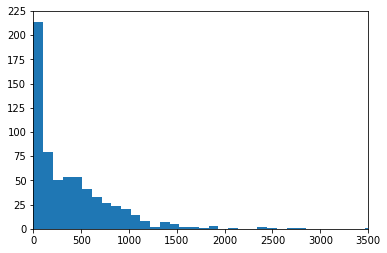

In [44]:
plt.xlim(0, 3500)
plt.hist(passed_total_minutes.values(), bins=35)
plt.show()

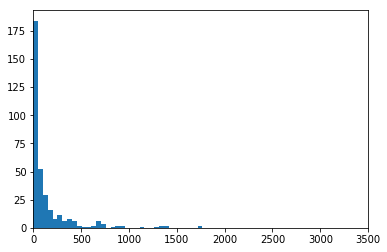

In [45]:
plt.xlim(0, 3500)
plt.hist(non_passed_total_minutes.values(), bins=35)
plt.show()

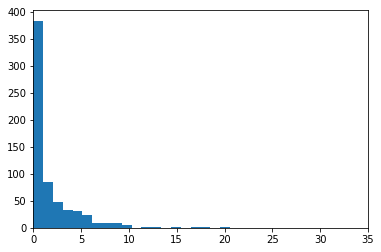

In [46]:
plt.xlim(0, 35)
plt.hist(passed_total_lessons.values(), bins=35)
plt.show()

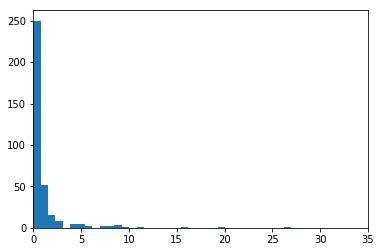

In [47]:
plt.xlim(0, 35)
plt.hist(non_passed_total_lessons.values(), bins=35)
plt.show()

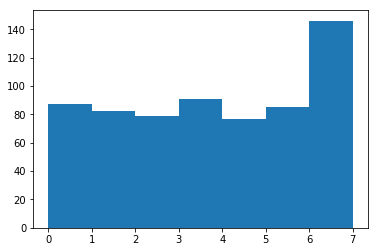

In [48]:
plt.hist(pass_has_visited.values(), bins=7)
plt.show()

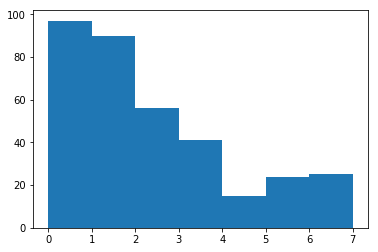

In [49]:
plt.hist(non_pass_has_visited.values(), bins=7)
plt.show()

## 改进图表及分享发现

In [50]:
######################################
#                 14                 #
######################################

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。
import seaborn as sns

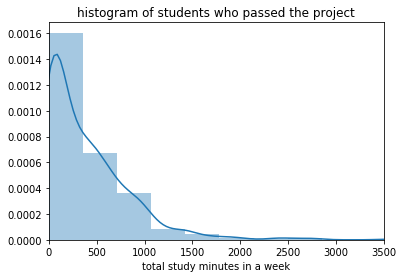

In [51]:
sns.distplot(passed_total_minutes.values(), bins=10)
plt.xlim(0, 3500)
plt.xlabel("total study minutes in a week")
plt.title("histogram of students who passed the project")
plt.show()

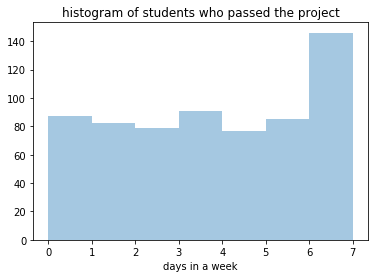

In [52]:
sns.distplot(pass_has_visited.values(), bins=7, kde=False)
plt.xlabel("days in a week")
plt.title("histogram of students who passed the project")
plt.show()